In [1]:
!pip install opencv-python

In [2]:
!pip install tensorflow

In [3]:
!pip install matplotlib


In [4]:
!pip install keras


In [5]:

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,Activation,LeakyReLU,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
# import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
import pickle
import os
import cv2
from os import listdir


In [7]:
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [8]:
root_dir = r'C:/Users/rehan/OneDrive/Desktop/All/Kodikon/1_CodeMob/models/data'

In [9]:
os.chdir(root_dir)
listdir()


['model', 'train']

In [10]:
def_size = tuple((256,256))

num_img = 1000

data_dir = os.path.join(root_dir,'train')


In [11]:
def conv_image_nparray(img_dir):
    try:
        image = cv2.imread(img_dir)
        if image is not None:
            image = cv2.resize(image,def_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f'The following error occured :{e}')
        return None

In [12]:
# Loading images from all classes
train_dir = listdir(data_dir)
len(train_dir)

4

In [13]:
# Loading data

image_list = []
label_list = []

try:
    for i in listdir():
        ind_class_folder = listdir(i)
        for j in ind_class_folder:
            # print(j)
            print(f"Processing {j}")
            apple_image_list = listdir(f"{data_dir}/{j}/")
            for image in apple_image_list[:num_img]:
                image_path = f"{data_dir}/{j}/{image}"
                if image_path.endswith('.jpg')==True or image_path.endswith(".JPG")==True:
                    image_list.append(conv_image_nparray(image_path))
                    label_list.append(j)
    print("Successfully loaded")
            



except Exception as e:
    print(f'Exception occured:{e}')


Processing appleclassifier.h5
Exception occured:[WinError 3] The system cannot find the path specified: 'C:/Users/rehan/OneDrive/Desktop/All/Kodikon/1_CodeMob/models/data\\train/appleclassifier.h5/'


In [14]:
print(len(image_list))

0


In [15]:
# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

# Check the number of images loaded for training
image_len = len(image_list)

In [ ]:
label_binarizer = LabelBinarizer()
image_lables = label_binarizer.fit_transform(label_list)

n_classes = len(label_binarizer.classes_)

print("The number of classes are:",n_classes)

In [ ]:
# Operation on data set
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(np_image_list,image_lables,test_size = 0.2,random_state = 42)

In [ ]:
# MODEL

EPOCHS = 30
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256
DEPTH = 3

In [ ]:
model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, name = 'my_dense'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_12 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 85, 85, 64)       

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow 
import keras
model.compile('adam', loss=tensorflow.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train model
print("Training CNN...")
history = model.fit(augment.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              validation_data=(x_test, y_test),
                              epochs=20, 
                              verbose=1)
        
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Training CNN...
Epoch 1/20
100/100 [==============================] - 242s 2s/step - loss: 0.3876 - accuracy: 0.8322 - val_loss: 2.2730 - val_accuracy: 0.4350
Epoch 2/20
100/100 [==============================] - 233s 2s/step - loss: 0.1552 - accuracy: 0.9228 - val_loss: 2.9994 - val_accuracy: 0.4137
Epoch 3/20
100/100 [==============================] - 234s 2s/step - loss: 0.1171 - accuracy: 0.9362 - val_loss: 2.5788 - val_accuracy: 0.4625
Epoch 4/20
100/100 [==============================] - 240s 2s/step - loss: 0.0827 - accuracy: 0.9566 - val_loss: 3.4255 - val_accuracy: 0.4100
Epoch 5/20
100/100 [==============================] - 279s 3s/step - loss: 0.0819 - accuracy: 0.9544 - val_loss: 2.1220 - val_accuracy: 0.4663
Epoch 6/20
100/100 [==============================] - 242s 2s/step - loss: 0.0872 - accuracy: 0.9481 - val_loss: 0.4384 - val_accuracy: 0.7937
Epoch 7/20
100/100 [==============================] - 276s 3s/step - loss: 0.0569 - accuracy: 0.9669 - val_loss: 0.0640 - val_

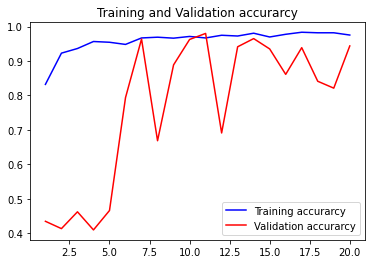

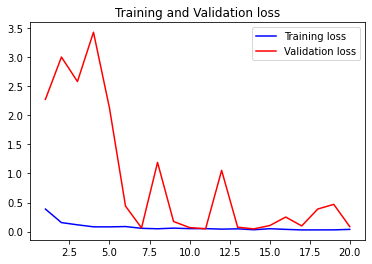

[INFO] Calculating model accuracy
25/25 [==============================] - 9s 359ms/step - loss: 0.0854 - accuracy: 0.9438
Test Accuracy: 94.37500238418579


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

"""Evaluating model accuracy by using the `evaluate` method"""

print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from os import listdir

def predict(imgs):
    image = cv2.imread(f'C:/Users/rehan/OneDrive/Desktop/All/Kodikon/1_CodeMob/test_images/{imgs}')
    plt.imshow(image)
    resize = tf.image.resize(image, (256,256))
    pred = model.predict(np.expand_dims(resize/255, 0))
    arr = tf.round(pred)
    arr = arr[0]
    ind = -1
    for i in range(len(arr)):
        # print(int(arr[i]))
        if int(arr[i])==1:
            ind = i
    final_list = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple__healthy']
    print(imgs,final_list[ind])


img_dir = r'C:/Users/rehan/OneDrive/Desktop/All/Kodikon/1_CodeMob/test_images'
a = listdir(img_dir)
for i in a:
    predict(i)
    # print(i)

# plt.imshow(img)
# plt.show()